# 2021-02-16 Exam

### General Instructions:

Welcome to the **Python Programming (for Data Science)** exam session! Please, read **carefully** the instructions below before start writing code. 

This session will last **75 minutes** and is divided into **two parts**: one about "general" Python programming and the other about Python programming for Data Science. Each part is made of a set of exercises, which globally accounts for **15** + **15** = **30 points**.
You will earn all of the points associated to an exercise **if and only if** the answer you provide passes successfully **all** the tests (both those that are visible and those that are hidden to you).
At the end of these two parts, there is a part related to Machine Learning which can be considered a bonus for the students of the Cohort 2019-2020 who will achieve at least a score of 22.<br />

To actually write down your implementation, make sure to fill in any place that says <code style="color:green">**_# YOUR CODE HERE_**</code>. Note also that you should **either comment or delete** any <code style="color:green">**raise NotImplementedError()**</code> exception.<br />

For this exam session **you will not be allowed** to use any lecture material yet you will be able to access the following APIs:

-  [Python](https://docs.python.org/)
-  [Numpy](https://numpy.org/)
-  [Scipy](https://docs.scipy.org/)
-  [Pandas](https://pandas.pydata.org/)
-  [Matplotlib](https://matplotlib.org/)
-  [Seaborn](http://seaborn.pydata.org/)
-  [SciKit-Learn](http://scikit-learn.org/)

Once you are done, save this notebook and rename it as follows:

<code>**YOURUSERNAME_2021-02-16.ipynb**</code>

where <code>**YOURUSERNAME**</code> is your actual username. To be consistent, we are expecting your username to be composed by your first name's initial, followed by your full lastname. As an example, in my case this notebook must be saved as <code>**gdinunzio_2021-02-16.ipynb**</code> (Remember to insert an underscore <code>**'_'**</code> between your username and the date).<br />

Finally, go back to the [Moodle](https://esami.elearning.unipd.it/)
) web page of the "**2021-02-16 Python Programming Exam**"; there, you will be able to upload your notebook file for grading.

<center><h3>Submissions are allowed until <span style="color:red">Tuesday, 16th February 2021 at 11:15 AM</span></h3></center>

Note that there is no limit on the number of submissions; however, be careful when you upload a new version of this notebook because each submission overwrites the previous one. 
The due date indicated above is **strict**; after that, the system will not accept any more submissions and the latest uploaded notebook will be the one considered for grading.

The archive you have downloaded (<code style="color:magenta">**2021-02-16-exam.zip**</code>) is orgaized as follows:

<code style="color:red">**2021-02-16-exam**</code> (root)<br />
|----<code style="color:green">**2020-02-16.ipynb**</code> (_this_ notebook)<br />
|----<code>**dataset_notype.csv**</code> (the dataset you will be using for answering data science related questions)<br />
|----<code>**database_type.sqlite**</code> (the database you will be using for answering data science related questions)<br />
|----<code>**README.txt**</code> (a description of the dataset above)

<center><h3>... Now, sit back, relax, and do your best!</h3></center>

In [1]:
import math
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Adding the following line, allows Jupyter Notebook to visualize plots
# produced by matplotlib directly below the code cell which generated those.
#%matplotlib inline
import seaborn as sns
from collections import Counter
from nose.tools import assert_equal
from operator import itemgetter
from scipy.stats import pearsonr

EPSILON = .0000001 # tiny tolerance for managing subtle differences resulting from floating point operations

DATASET_FILE = "dataset_notype.csv"

# Part 1: General Coding (15 points)

For **Part 1**, you will be asked to use the dictionary below - called <code>**friends**</code> - which represents a small social network graph extracted from **10** characters of the _Friends_ TV series. Each entry of this dictionary contains the name of the character as key and a list of tuples as value; each tuple, in turn, is composed of two items: the name of a character and a float in the range **(0, 1]** which measures the strength of this relationship.<br /> 
Please, execute the cell right below and answer the following questions.

In [2]:
friends = {
    'Rachel Green': [('Ross Geller', 1.0), 
                     ('Paul Stevens', 0.46),
                     ('Chandler Bing', 0.73),
                     ('Monica Geller', 0.92),
                     ('Phoebe Buffay', 0.94),
                     ('Joey Tribbiani', 0.97),
                     ('Gunther', 0.01)
                    ],
    'Monica Geller': [('Ross Geller', 0.85),
                      ('Phoebe Buffay', 0.89),
                      ('Rachel Green', 0.89),
                      ('Chandler Bing', 1.0),
                      ('Joey Tribbiani', 0.90),
                      ('Janice Hosenstein', 0.07),
                      ('Gunther', 0.51),
                      ('Ursula Buffay', 0.42),
                      ('Paul Stevens', 0.27)
                     ],
    'Phoebe Buffay': [('Ursula Buffay', 0.01),
                      ('Joey Tribbiani', 0.96),
                      ('Monica Geller', 0.81),
                      ('Rachel Green', 0.88),
                      ('Chandler Bing', 0.64),
                      ('Ross Geller', 0.83),
                      ('Gunther', 0.25)
                     ],
    'Joey Tribbiani': [('Phoebe Buffay', 0.98),
                       ('Chandler Bing', 1.0),
                       ('Ross Geller', 0.99),
                       ('Rachel Green', 0.97),
                       ('Monica Geller', 0.95)
                      ],
    'Chandler Bing': [('Monica Geller', 1.0),
                      ('Joey Tribbiani', 1.0),
                      ('Ross Geller', 0.97),
                      ('Phoebe Buffay', 0.81),
                      ('Rachel Green', 0.68),
                      ('Gunther', 0.37),
                      ('Janice Hosenstein', 0.16)
                     ],
    'Ross Geller': [('Monica Geller', 0.95),
                    ('Joey Tribbiani', 0.96),
                    ('Chandler Bing', 0.96),
                    ('Phoebe Buffay', 0.91),
                    ('Rachel Green', 1.0),
                    ('Paul Stevens', 0.04)],
    'Gunther': [('Rachel Green', 1.0)],
    'Ursula Buffay': [],
    'Janice Hosenstein': [('Chandler Bing', 1.0),
                          ('Monica Geller', 0.01),
                          ('Joey Tribbiani', 0.32)
                         ],
    'Paul Stevens': [('Rachel Green', 0.88),
                     ('Ross Geller', 0.29),
                     ('Monica Geller', 0.57)
                    ]
}

## Exercise 1.1 (1 point)

Implement the function <code><b>n_friends_of</b></code>, which takes as input a string (i.e., a character) <code><b>u</b></code> and returns the total number of friends of <code><b>u</b></code>, or <code><b>-1</b></code> if <code><b>u</b></code> is not part of the <code><b>friends</b></code> social network.

In [3]:
def n_friends_of(u):
    """
    Return the total number of u's friends or -1 if u is not part of the `friends` network.
    """
    # YOUR CODE HERE
    
    if u not in friends:
        return -1
    else:
        return len(friends[u])
    
    #raise NotImplementedError()

In [4]:
"""
Test the correctness of the implementation of the `n_friends_of` function
"""
# save the original `friends` social network graph 
# (redundant operation so as to be sure everything will be ok if the original `friends` gets accidentally modified)
old_friends = copy.deepcopy(friends)

# Tests
assert_equal(6, n_friends_of("Ross Geller"))
assert_equal(7, n_friends_of("Phoebe Buffay"))
assert_equal(False, n_friends_of("Ursula Buffay") > 1)

# revert to the original `friends` social network graph
friends = old_friends

## Exercise 1.2 (3 points)

Implement the function <code><b>avg_friend_score_map</b></code>, which builds a <b>new</b> dictionary out of the given <code><b>friends</b></code> as follows: for each entry of the original <code><b>friends</b></code> (i.e., character) it creates a new entry on the new dictionary, whose key is the character's name (i.e., the key of the original dictionary) and whose value is the <b>average friendship score</b> of that character <b>providing that character has AT LEAST ONE friend</b> (otherwise, no entry will be created for that character).

In [5]:
def avg_friend_score_map():
    avg_friend_score_map = {}
    
    #YOUR CODE HERE
    for char in friends.keys():
        if len(friends[char]) != 0:
            score = []
            for i in range(len(friends[char])):
                score.append(friends[char][i][1])
            avg_friend_score_map[char] = np.mean(score)
    return avg_friend_score_map
        
avg_friend_score_map()

{'Rachel Green': 0.7185714285714285,
 'Monica Geller': 0.6444444444444444,
 'Phoebe Buffay': 0.6257142857142857,
 'Joey Tribbiani': 0.978,
 'Chandler Bing': 0.7128571428571429,
 'Ross Geller': 0.8033333333333333,
 'Gunther': 1.0,
 'Janice Hosenstein': 0.44333333333333336,
 'Paul Stevens': 0.58}

### 

In [8]:
"""
Test the correctness of the implementation of the `avg_friend_score_map` function
"""

# save the original `friends` social network graph 
# (redundant operation so as to be sure everything will be ok if the original `friends` gets accidentally modified)
old_friends = copy.deepcopy(friends)

# call the `avg_friend_score_map` function
afsm = avg_friend_score_map()
# Tests
assert_equal(True, np.abs(afsm["Rachel Green"] - 0.7185714285714285) < EPSILON)
assert_equal(True, np.abs(afsm["Paul Stevens"] - 0.58) < EPSILON)
assert_equal(True, np.abs(afsm["Phoebe Buffay"] - 0.6257142857142857) < EPSILON)

# revert to the original `friends` social network graph
friends = old_friends

## Exercise 1.3 (5 points)

Implement the function <code><b>top_k_in_degree</b></code>, which takes as input an integer <code><b>k</b></code> and returns the list of top-<code><b>k</b></code> characters having the highest <b>in-degree</b>. The in-degree of a character <code><b>u</b></code> is the number of _other_ characters <code><b>v</b></code> who have <code><b>u</b></code> as friend. The final list to be returned is actually a list of _tuples_ $[(a_1, b_1), \ldots, (a_k, b_k)]$, where each $a_i$ is the name of a character and $b_i$ is her/his in-degree value. Finally, the list must be sorted in <b>non-decrasing order</b> of $b_i$ and in <b>non-increasing order</b> of $a_i$ (i.e., lexicographically). 

(**SUGGESTION:** You can do this exercise with one-pass scan over the original <code><b>friends</b></code> dictionary and using an additional dictionary <code><b>in_degree_map</b></code> where storing information about each character's in-degree. Once you have successfully populated that, you can get the list of tuples corresponding to the dictionary by simply invoking <code><b>in_degree_map.items()</b></code>...)

In [17]:


# Define the function 'top_k_in_degree' which accepts the parameter 'k'
def top_k_in_degree(k):
    # Initialize a dictionary 'in_degree_map' where each character's name is a key,
    # and its initial in-degree value is 0
    
    
    
    
    in_degree_map = {char: 0 for char in friends.keys()}

    #print(in_degree_map)
    # Iterate over each character and their friends in the 'friends' dictionary
    for char, char_friends in friends.items():
        #print(char), print(char_friends)
    # For each friend of the current character
        for friend, _ in char_friends:
            #print(friend,_)
            
            # Increment the in-degree of the friend by 1
            in_degree_map[friend] += 1  
            #print(in_degree_map)
             # Sort the 'in_degree_map' by in-degree value in non-decreasing order and then by name in non-increasing order
             # 'sorted_list_of_tuples' will be a list of tuples where each tuple contains a character's name and its in-degree
            
            sorted_list_of_tuples = sorted(in_degree_map.items(), key = lambda x: (-x[1], x[0]))
            
            """sorted(..., key = lambda x: (-x[1], x[0])): This sorts the items of the dictionary. The sorting 
            is based on a custom key function defined by the lambda expression: lambda x: (-x[1], x[0]) 
            means that the sorting is primarily based on the in-degree value (x[1]) 
            in descending order (hence the negative sign) and, in the case of ties,
            lexicographically by the character's name (x[0]) in ascending order."""
            
            
    return sorted_list_of_tuples[:k]

top_k_in_degree(5)

[('Monica Geller', 7),
 ('Rachel Green', 7),
 ('Chandler Bing', 6),
 ('Joey Tribbiani', 6),
 ('Ross Geller', 6)]

In [18]:
"""
Test the correctness of the implementation of the `top_k_in_degree` function
"""

# save the original `friends` social network graph 
# (redundant operation so as to be sure everything will be ok if the original `friends` gets accidentally modified)
old_friends = copy.deepcopy(friends)

# Tests
assert_equal(5, len(top_k_in_degree(5)))
assert_equal('Rachel Green', top_k_in_degree(3)[1][0])
assert_equal('Monica Geller', top_k_in_degree(1)[0][0])
assert_equal(6, top_k_in_degree(10)[3][1])

# revert to the original `friends` social network graph
friends = old_friends

## Exercise 1.4 (6 points)

In this exercise, you are asked to implement the function <code><b>path_likelihood</b></code>, which takes as input a list of characters <code><b>character_list</b></code> and returns the likelihood of the path between each element of the input list, <b>providing such a path exists</b>.<br/>
The function assumes you will be working with a variant of the original <code><b>friends</b></code> dictionary given at the beginning; more specifically, you will be asked to firstly transform <code><b>friends</b></code> into another dictionary by implementing the function <code><b>markovian_friends</b></code> below. Such a function, transforms the original dictionary in such a way that original friendship scores are considered as probability scores (i.e., a probability distribution of the original friendship scores). For your own convenience, it would be beneficial if <code><b>markovian_friends</b></code> is a dictionary of dictionaries, as follows:
$$
markovian\_friends[u] = \{v: p_{u,v}, w: p_{u,w}, \ldots, z: p_{u,z}\} 
$$
In other words, each key <code><b>u</b></code> of <code><b>markovian_friends</b></code> is mapped to another dictionary (rather than a list of tuples, as originally done) whose keys are <code><b>u</b></code>'s friend names and whose values are the normalized friendship scores.<br/>
Finally, the path likelihood of a sequence of characters given as input can be computed as follows: it is either the product of all the friendship scores along the path or **0** if no paths exist between the first and the last character of the input sequence.

(**NOTE:** You can assume the input sequence is not empty and the first element is a character who is present in the social network.)

In [155]:
#def markovian_friends():
    
"""
    Return a new dictionary representing the `friends` graph, where friendship scores are considered as probabilities.
    In other words, `markovian_friends[u] = {v: p_u,v, w: p_u,w, ..., z: p_u,z}`, where:
    p_u,i = the probability of reaching i from u (i.e., the normalized friendship score between u and i).
"""

#def path_likelihood(character_list):
"""
    Return the path likelihood of the sequence of characters given as input `character_list`.
    Let [u1, ..., um] be the input sequence of characters, then the path likelihood is as follows:
        - p_u1,u2 * p_u2,u3 * ... * p_um-1,um (if there exists a path connecting u1 to um)
        - 0 (if there exists at least two consecutive characters of the sequence (ui, ui+1) which are not directly connected)
    (NOTE: `character_list` in not empty and its first element u1 is surely in the social network).
"""




    
def markovian_friends(friends):
    markovian = {}
    for person, friendships in friends.items():
        # Calculate the total friendship score for normalization
        total_score = sum(score for _, score in friendships)
        # Avoid division by zero by checking if total_score is greater than 0
        if total_score > 0:
            # Normalize and create a dictionary for each person's friendships
            markovian[person] = {friend: score / total_score for friend, score in friendships}
    return markovian

def path_likelihood(character_list):
    # Transform the friends dictionary into the markovian_friends variant
    markovian = markovian_friends(friends)
    likelihood = 1  # Initialize likelihood as 1 (100%)
    for i in range(len(character_list) - 1):
        current_char = character_list[i]
        next_char = character_list[i + 1]
        # If next character is not a friend of current character, or character does not exist, return 0
        if next_char not in markovian.get(current_char, {}):
            return 0
        # Multiply likelihood by the friendship probability
        likelihood *= markovian[current_char][next_char]
    return likelihood
    

In [156]:
"""
Test the correctness of the implementation of the `path_likelihood` function
"""

# save the original `friends` social network graph 
# (redundant operation so as to be sure everything will be ok if the original `friends` gets accidentally modified)
old_friends = copy.deepcopy(friends)

# Tests
assert_equal(True, 
             np.abs(path_likelihood(['Rachel Green', 'Ross Geller']) - 0.1988071570576541) < EPSILON)
assert_equal(True, 
             np.abs(path_likelihood(['Phoebe Buffay', 'Ursula Buffay']) - 0.0022831050228310505) < EPSILON)
assert_equal(True, 
             np.abs(path_likelihood(['Monica Geller', 'Chandler Bing', 'Gunther']) - 0.012784189067790755) < EPSILON)
assert_equal(0, 
             path_likelihood(['Monica Geller', 'Chandler Bing', 'Gunther', 'Ross Geller']))

# revert to the original `friends` social network graph
friends = old_friends

# Part 2: Data Science (15 points)

In this part, you will be working with the dataset file <code>**dataset_notype.csv**</code> and a database file named <code>**dataset_type.sqlite**</code>. For a complete description of this data source, please refer to the <code>**README.txt**</code> file included in the archive.
In a nutshell, this dataset contains **1781** unique (anonymised) URLs, along with a set of **19 features** and a **binary class label** (<code>**TYPE**</code>), which indicates whether the corresponding URL is malicious (<b>1</b>) or not (<b>0</b>).<br />
The cell below is responsible for correctly loading the first part of dataset (without the *type* column) from the <code>**dataset_notype.csv**</code> file. Once this is executed, you can start answering the questions below.

In [24]:
# Load the dataset stored at `DATASET_FILE` using "," as field separator and '?' to detect NAs

data = pd.read_csv(DATASET_FILE, 
                   sep=';',
                   na_values=['?', 'None'])

print("Loaded `websites` dataset into a dataframe of size ({} x {})".format(data.shape[0], data.shape[1]))

data.head()

Loaded `websites` dataset into a dataframe of size (1781 x 20)


URL  URL_LENGTH  NUMBER_SPECIAL_CHARACTERS     CHARSET  \
0   M0_109          16                          7  iso-8859-1   
1  B0_2314          16                          6       utf-8   
2   B0_911          16                          6    us-ascii   
3   B0_113          17                          6  iso-8859-1   
4   B0_403          17                          6       utf-8   

                  SERVER  CONTENT_LENGTH WHOIS_COUNTRY WHOIS_STATEPRO  \
0                  nginx           263.0           NaN            NaN   
1          Apache/2.4.10         15087.0           NaN            NaN   
2  Microsoft-HTTPAPI/2.0           324.0           NaN            NaN   
3                  nginx           162.0            US             AK   
4                    NaN        124140.0            US             TX   

      WHOIS_REGDATE WHOIS_UPDATED_DATE  TCP_CONVERSATION_EXCHANGE  \
0  10/10/2015 18:21                NaN                          7   
1               NaN                NaN                         17   
2               NaN                NaN                          0   
3    7/10/1997 4:00    12/09/2013 0:45                         31   
4   12/05/1996 0:00    11/04/2017 0:00                         57   

   DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  SOURCE_APP_PACKETS  \
0                     0           2        700                   9   
1                     7           4       1230                  17   
2                     0           0          0                   0   
3                    22           3       3812                  39   
4                     2           5       4278                  61   

   REMOTE_APP_PACKETS  SOURCE_APP_BYTES  REMOTE_APP_BYTES  APP_PACKETS  \
0                  10              1153               832            9   
1                  19              1265              1230           17   
2                   0                 0                 0            0   
3                  37             18784              4380           39   
4                  62            129889              4586           61   

   DNS_QUERY_TIMES  
0              2.0  
1              0.0  
2              0.0  
3              8.0  
4              4.0

## Exercise 2.1 (1 point)

Implement the function <code>**get_avg_dns_query_times**</code> below. This takes as input a <code>**pandas.DataFrame**</code> object, and returns the average DNS query times (i.e., <code><b>DNS_QUERY_TIMES</b></code> field) in the dataset.

(**NOTE:** Use the mean() function of the pandas package in order to avoid errors in numerical approximations.)

In [25]:
def get_avg_dns_query_time(data):
    """
    Return the average DNS query times (i.e., `DNS_QUERY_TIMES` field) computed across the dataset.
    """
    
    # YOUR CODE HERE
    return data['DNS_QUERY_TIMES'].mean()
    #raise NotImplementedError()

In [26]:
"""
Test the correctness of the implementation of the `get_avg_dns_query_time` function
"""

# Tests
assert_equal(True, get_avg_dns_query_time(data) < 100)
assert_equal(True, get_avg_dns_query_time(data) > 1)

## Exercise 2.2 (1 points)

Implement the function <code><b>bytes_per_app_packet</b></code> below. This takes as input a <code>**pandas.DataFrame**</code> object, and creates a new column named <code><b>BYTES_PER_APP_PACKET</b></code> which contains the average bytes per app packet, i.e., it results from the ratio of two columns: <code><b>APP_BYTES</b></code> and <code><b>APP_PACKETS</b></code>.

In [27]:
data.head()

URL  URL_LENGTH  NUMBER_SPECIAL_CHARACTERS     CHARSET  \
0   M0_109          16                          7  iso-8859-1   
1  B0_2314          16                          6       utf-8   
2   B0_911          16                          6    us-ascii   
3   B0_113          17                          6  iso-8859-1   
4   B0_403          17                          6       utf-8   

                  SERVER  CONTENT_LENGTH WHOIS_COUNTRY WHOIS_STATEPRO  \
0                  nginx           263.0           NaN            NaN   
1          Apache/2.4.10         15087.0           NaN            NaN   
2  Microsoft-HTTPAPI/2.0           324.0           NaN            NaN   
3                  nginx           162.0            US             AK   
4                    NaN        124140.0            US             TX   

      WHOIS_REGDATE WHOIS_UPDATED_DATE  TCP_CONVERSATION_EXCHANGE  \
0  10/10/2015 18:21                NaN                          7   
1               NaN                NaN                         17   
2               NaN                NaN                          0   
3    7/10/1997 4:00    12/09/2013 0:45                         31   
4   12/05/1996 0:00    11/04/2017 0:00                         57   

   DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  SOURCE_APP_PACKETS  \
0                     0           2        700                   9   
1                     7           4       1230                  17   
2                     0           0          0                   0   
3                    22           3       3812                  39   
4                     2           5       4278                  61   

   REMOTE_APP_PACKETS  SOURCE_APP_BYTES  REMOTE_APP_BYTES  APP_PACKETS  \
0                  10              1153               832            9   
1                  19              1265              1230           17   
2                   0                 0                 0            0   
3                  37             18784              4380           39   
4                  62            129889              4586           61   

   DNS_QUERY_TIMES  
0              2.0  
1              0.0  
2              0.0  
3              8.0  
4              4.0

In [28]:
def bytes_per_app_packet(data):
    """
    Extend the input dataframe with a new column `BYTES_PER_APP_PACKET`, which contains the average number
    of bytes per app packet.
    """
    # YOUR CODE HERE
    data['BYTES_PER_APP_PACKET'] = data['APP_BYTES']/data['APP_PACKETS']
    #raise NotImplementedError()

In [29]:
"""
Test the correctness of the implementation of the `bytes_per_app_packet` function
"""

# Call the `bytes_per_app_packet` function on a deep copy of the original dataset
data_cpy = data.copy()
bytes_per_app_packet(data_cpy)

# Tests
assert_equal(True, "BYTES_PER_APP_PACKET" in data_cpy.columns.tolist())
assert_equal(True, np.abs(data_cpy.loc[0,"BYTES_PER_APP_PACKET"] - 77.77777777777777) < EPSILON)
assert_equal(True, np.abs(data_cpy.loc[5,"BYTES_PER_APP_PACKET"] - 81.27272727272727) < EPSILON)
assert_equal(True, np.abs(data_cpy.loc[37,"BYTES_PER_APP_PACKET"] - 64.875) < EPSILON)

## Exercise 2.3 (2 points)

Connect to the database *database_type.sqlite* and use an SQL query to select all the data of all the columns contained in the table *data_extendd*. Build a pandas DataFrame with the result set in a varibale named *ext*. Rename the columns of the dataframe with the following names: "ID", "TYPE".




In [30]:
import sqlite3

# YOUR CODE HERE
conn = sqlite3.connect('database_type.sqlite')
cur = conn.cursor()
query = pd.read_sql_query('SELECT * FROM data_extended', conn)
ext = pd.DataFrame(query)
ext = ext.rename(columns = {'URL':'ID'})
ext.head()
#raise NotImplementedError()

## THERE IS NO TEST OF CORRECTNESS FOR THIS PART


ID  TYPE
0     B0_1     0
1    B0_10     0
2   B0_100     0
3  B0_1000     0
4  B0_1001     0

## Exercise 2.4 (2 points)

Join the dataframe *data* created before exercise 2.1 and the dataframe *ext* built in the previous exercise using the column *URL* and *ID* respectively. Save the result in the variable *data_ext* (this dataframe must have both the URL and the ID columns).


In [31]:
# YOUR CODE HERE
new_ext = ext.rename(columns = {'ID': 'URL'})
data_ext = data.merge(new_ext, on = 'URL')
data_ext['ID'] = data_ext['URL']
data_ext.shape
#raise NotImplementedError()

(1781, 22)

In [32]:
"""
Test the correctness of `dist_plot_age`, `mu` and `sigma`
"""

assert_equal(True, (data_ext.shape[1] == 22))
assert_equal(True, (data_ext['ID'][1] == 'B0_2314'))

In [33]:
data_ext.head()

URL  URL_LENGTH  NUMBER_SPECIAL_CHARACTERS     CHARSET  \
0   M0_109          16                          7  iso-8859-1   
1  B0_2314          16                          6       utf-8   
2   B0_911          16                          6    us-ascii   
3   B0_113          17                          6  iso-8859-1   
4   B0_403          17                          6       utf-8   

                  SERVER  CONTENT_LENGTH WHOIS_COUNTRY WHOIS_STATEPRO  \
0                  nginx           263.0           NaN            NaN   
1          Apache/2.4.10         15087.0           NaN            NaN   
2  Microsoft-HTTPAPI/2.0           324.0           NaN            NaN   
3                  nginx           162.0            US             AK   
4                    NaN        124140.0            US             TX   

      WHOIS_REGDATE WHOIS_UPDATED_DATE  ...  REMOTE_IPS  APP_BYTES  \
0  10/10/2015 18:21                NaN  ...           2        700   
1               NaN                NaN  ...           4       1230   
2               NaN                NaN  ...           0          0   
3    7/10/1997 4:00    12/09/2013 0:45  ...           3       3812   
4   12/05/1996 0:00    11/04/2017 0:00  ...           5       4278   

   SOURCE_APP_PACKETS  REMOTE_APP_PACKETS  SOURCE_APP_BYTES  REMOTE_APP_BYTES  \
0                   9                  10              1153               832   
1                  17                  19              1265              1230   
2                   0                   0                 0                 0   
3                  39                  37             18784              4380   
4                  61                  62            129889              4586   

   APP_PACKETS  DNS_QUERY_TIMES  TYPE       ID  
0            9              2.0     1   M0_109  
1           17              0.0     0  B0_2314  
2            0              0.0     0   B0_911  
3           39              8.0     0   B0_113  
4           61              4.0     0   B0_403  

[5 rows x 22 columns]

## Exercise 2.3 (4 points)

Implement the function <code><b>get_servers_with_largest_avg_malicious_content_length</b></code> below, which takes as input a <code><b>pandas.DataFrame</b></code> and an integer <code><b>k</b></code>, and returns an **ordered list** of <code><b>k</b></code> elements, where each element of is a tuple containing the name of the server (i.e., the <code><b>SERVER</b></code> field) and the **average** of content length (i.e., the <code><b>CONTENT_LENGTH</b></code> field) computed for that server, yet **limited to only malicious web traffic** (i.e., <code><b>TYPE=1</b></code>). The final list shall be ordered by such a computed average (non-ascending) and, within that, lexicographically sorted (non-descending).

(**SUGGESTION:** In order to answer this question, you will need to compute the average content length for each server, which must be set to **0** whenever a server is not involved in _any_ malicious traffic. You should use <code><b>math.isnan(val)</b></code> method to test whether average content length <code><b>val</b></code> is NaN...)

In [128]:
def get_servers_with_largest_avg_malicious_content_length(data, k):
    
    res = [[s, data[(data.SERVER == s) & (data.TYPE == 1)]['CONTENT_LENGTH'].mean()] for s in data.SERVER.unique()]
    for i in range(len(res)):
        if math.isnan(res[i][1]):
            res[i][1] = 0
        res[i] = tuple(res[i])
    
    print(res) 
    res = sorted(sorted(res, key = lambda x: x[0], reverse = False), key= lambda x: x[1], reverse = True)
    
    return res[:k]
    #print(len(malicious_servers))
    
    # YOUR CODE HERE
    # return a list of k elements, each element is a tuple containing name of the server and average content length. 
    # must be only type 1
    # list must be ordered in non ascending computed average and within that, lexicographically sorted. 
    #.zip(data_ext['SERVER'], data_ext['average_ecc_ecc'])
    #list_of_servers_withavg =  
    #sorted_list = 
    
    #.apply()
get_servers_with_largest_avg_malicious_content_length(data_ext,10)

[('nginx', 631.5), ('Apache/2.4.10', 0), ('Microsoft-HTTPAPI/2.0', 324.0), (nan, 0), ('Apache/2', 8738.5), ('nginx/1.10.1', 0), ('Apache', 2103.0), ('Apache/2.2.15 (Red Hat)', 0), ('Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4', 960.75), ('openresty/1.11.2.1', 0), ('Apache/2.2.22', 0), ('Apache/2.4.7 (Ubuntu)', 0), ('nginx/1.12.0', 2762.6666666666665), ('Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4', 0), ('Oracle-iPlanet-Web-Server/7.0', 0), ('cloudflare-nginx', 0), ('nginx/1.6.2', 6173.0), ('openresty', 0), ('Heptu web server', 0), ('Pepyaka/1.11.3', 0), ('nginx/1.8.0', 216.33333333333334), ('nginx/1.10.1 + Phusion Passenger 5.0.30', 0), ('Apache/2.2.29 (Amazon)', 0), ('Microsoft-IIS/7.5', 324.0), ('LiteSpeed', 0), ('Apache/2.4.25 (cPanel) OpenSSL/1.0.1e-fips mod_bwlimited/1.4', 0), ('tsa_c', 0), ('Apache/2.2.0 (Fedora)', 0), ('Apache/2.2.22 (Debian)', 9192.0), ('Apache/2.2.15 (CentOS)', 0), ('Apache/2.4.25', 0), ('Apache/2.4.25 (Amazon) PHP/7.0.14', 0), ('

TypeError: '<' not supported between instances of 'float' and 'str'

In [129]:
"""
Test the correctness of the implementation of the `get_servers_with_largest_avg_malicious_content_length` function
"""

# Call `get_servers_with_largest_avg_malicious_content_length` function
data_cpy = data_ext.copy()
largest_avg_malicious_content_length = get_servers_with_largest_avg_malicious_content_length(data_cpy, 1000)

# Tests
assert_equal(238, len(largest_avg_malicious_content_length))
assert_equal('marrakesh 1.12.2', largest_avg_malicious_content_length[1][0])
assert_equal(9192, largest_avg_malicious_content_length[3][1])
assert_equal(('Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4', 960.75), 
             largest_avg_malicious_content_length[10])

[('nginx', 631.5), ('Apache/2.4.10', 0), ('Microsoft-HTTPAPI/2.0', 324.0), (nan, 0), ('Apache/2', 8738.5), ('nginx/1.10.1', 0), ('Apache', 2103.0), ('Apache/2.2.15 (Red Hat)', 0), ('Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4', 960.75), ('openresty/1.11.2.1', 0), ('Apache/2.2.22', 0), ('Apache/2.4.7 (Ubuntu)', 0), ('nginx/1.12.0', 2762.6666666666665), ('Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4', 0), ('Oracle-iPlanet-Web-Server/7.0', 0), ('cloudflare-nginx', 0), ('nginx/1.6.2', 6173.0), ('openresty', 0), ('Heptu web server', 0), ('Pepyaka/1.11.3', 0), ('nginx/1.8.0', 216.33333333333334), ('nginx/1.10.1 + Phusion Passenger 5.0.30', 0), ('Apache/2.2.29 (Amazon)', 0), ('Microsoft-IIS/7.5', 324.0), ('LiteSpeed', 0), ('Apache/2.4.25 (cPanel) OpenSSL/1.0.1e-fips mod_bwlimited/1.4', 0), ('tsa_c', 0), ('Apache/2.2.0 (Fedora)', 0), ('Apache/2.2.22 (Debian)', 9192.0), ('Apache/2.2.15 (CentOS)', 0), ('Apache/2.4.25', 0), ('Apache/2.4.25 (Amazon) PHP/7.0.14', 0), ('

TypeError: '<' not supported between instances of 'float' and 'str'

## Exercise 2.4 (5 points)

This exercise is made of **3** main questions, which you can answer independently to each other. Use the newly created *data_ext* dataframe.

### Question 1 (1 point)

Feature <code><b>WHOIS_COUNTRY</b></code> represents a categorical variable which can take on <b>48</b> distinct values.
Implement the function <code><b>top_k_countries</b></code> below, which takes as input an integer <code><b>k</b></code> and returns the list of the <code><b>k</b></code>-most frequent countries appearing in the dataset.

(**NOTE:** To access the 0-based indices of a <code><b>pandas.Series</b></code> object you can use the <code><b>.index</b></code> property associated to that object).

In [145]:
def top_k_countries(k):
    
    # YOUR CODE HERE
    
    return list(dict(pd.value_counts(data['WHOIS_COUNTRY'])[:k]).keys())
    #raise NotImplementedError()
    


In [146]:
"""
Test the correctness of the `top_k_countries`
"""

# Tests
assert_equal('US', top_k_countries(10)[0])
assert_equal('CA', top_k_countries(10)[1])
assert_equal('GB', top_k_countries(20)[5])

### Question 2 (2 points)

Assign the correct values to the three variables below, according to the following requests.

-  <code><b>nan_charset_ids</b></code> should contain the index of the records of the dataframe whose values of <code><b>CHARSET</b></code> is <code><b>NA</b></code>;

-  <code><b>nan_charset_ratio</b></code> should contain the proportion of records (out of all records) of the dataframe whose values of <code><b>CHARSET</b></code> is <code><b>NA</b></code>;

-  <code><b>data_cpy</b></code> is a copy of the original dataframe, where where <code><b>NA</b></code> values of <code><b>CHARSET</b></code> will be replaced with the mode (i.e., most frequent value) calculated over non-<code><b>NA</b></code> values.

(**NOTE:** Remember that <code><b>mode()</b></code> returns a one-element <code><b>pandas.Series</b></code> object; to get the actual mode value you have to pick the first and only element of that series...)

In [147]:
nan_charset_ids = None # assign this to the index of records whose values of `CHARSET` is NA
nan_charset_ratio = None # assign this to the ratio of NA values of `CHARSET`
data_cpy = data_ext.copy() # copy of the original dataframe, where NA values of `CHARSET` will be replaced with the mode

# YOUR CODE HERE

nan_charset_ids = data[~data.CHARSET.isna()].index
nan_charset_ratio = len(nan_charset_ids)/data.shape[0]

data[~data.CHARSET.isna()].mode()

#raise NotImplementedError()

URL  URL_LENGTH  NUMBER_SPECIAL_CHARACTERS CHARSET  SERVER  \
0        B0_1        39.0                        9.0   utf-8  Apache   
1       B0_10         NaN                        NaN     NaN     NaN   
2      B0_100         NaN                        NaN     NaN     NaN   
3     B0_1000         NaN                        NaN     NaN     NaN   
4     B0_1001         NaN                        NaN     NaN     NaN   
...       ...         ...                        ...     ...     ...   
1769    M4_73         NaN                        NaN     NaN     NaN   
1770    M4_74         NaN                        NaN     NaN     NaN   
1771    M4_75         NaN                        NaN     NaN     NaN   
1772     M4_8         NaN                        NaN     NaN     NaN   
1773     M4_9         NaN                        NaN     NaN     NaN   

      CONTENT_LENGTH WHOIS_COUNTRY WHOIS_STATEPRO    WHOIS_REGDATE  \
0              324.0            US             CA  17/09/2008 0:00   
1                NaN           NaN            NaN              NaN   
2                NaN           NaN            NaN              NaN   
3                NaN           NaN            NaN              NaN   
4                NaN           NaN            NaN              NaN   
...              ...           ...            ...              ...   
1769             NaN           NaN            NaN              NaN   
1770             NaN           NaN            NaN              NaN   
1771             NaN           NaN            NaN              NaN   
1772             NaN           NaN            NaN              NaN   
1773             NaN           NaN            NaN              NaN   

     WHOIS_UPDATED_DATE  TCP_CONVERSATION_EXCHANGE  DIST_REMOTE_TCP_PORT  \
0        2/09/2016 0:00                        0.0                   0.0   
1                   NaN                        NaN                   NaN   
2                   NaN                        NaN                   NaN   
3                   NaN                        NaN                   NaN   
4                   NaN                        NaN                   NaN   
...                 ...                        ...                   ...   
1769                NaN                        NaN                   NaN   
1770                NaN                        NaN                   NaN   
1771                NaN                        NaN                   NaN   
1772                NaN                        NaN                   NaN   
1773                NaN                        NaN                   NaN   

      REMOTE_IPS  APP_BYTES  SOURCE_APP_PACKETS  REMOTE_APP_PACKETS  \
0            0.0        0.0                 0.0                 0.0   
1            NaN        NaN                 NaN                 NaN   
2            NaN        NaN                 NaN                 NaN   
3            NaN        NaN                 NaN                 NaN   
4            NaN        NaN                 NaN                 NaN   
...          ...        ...                 ...                 ...   
1769         NaN        NaN                 NaN                 NaN   
1770         NaN        NaN                 NaN                 NaN   
1771         NaN        NaN                 NaN                 NaN   
1772         NaN        NaN                 NaN                 NaN   
1773         NaN        NaN                 NaN                 NaN   

      SOURCE_APP_BYTES  REMOTE_APP_BYTES  APP_PACKETS  DNS_QUERY_TIMES  
0                  0.0               0.0          0.0              0.0  
1                  NaN               NaN          NaN              NaN  
2                  NaN               NaN          NaN              NaN  
3                  NaN               NaN          NaN              NaN  
4                  NaN               NaN          NaN              NaN  
...                ...               ...          ...              ...  
1769               NaN     

In [150]:
"""
Test the correctness of `nan_charset_ids`, `nan_charset_ratio`, and `data_cpy`
"""

assert_equal(False, (nan_charset_ids is None))
assert_equal(False, (nan_charset_ratio is None))
assert_equal(False, (data_cpy is None))
assert_equal(81, nan_charset_ids[1])

AssertionError: 81 != 1

### Question 3 (2 points)

Plot the distribution of <code><b>CONTENT_LENGHT</b></code> over the two possible classes of traffic (i.e., <code><b>TYPE</b></code>) using <code><b>sns.barplot</b></code> and assign the result of the plot to the variable <code><b>bar_plot</b></code>. 

In addition to that, assign to the variable <code><b>pearson_r</b></code> the Pearson's correlation coefficient computed between the two random varibles (<code><b>APP_BYTES</b></code> and <code><b>APP_PACKETS</b></code>). This can be computed by calling the <code><b>pearsonr</b></code> scipy's built-in function, which takes as input the two random variables and returns a **pair**: the first item is the _actual_ Pearson's correlation coefficient, whilst the second item is the $p$-value associated to the computed statistic.

ValueError: x and y must have the same length.

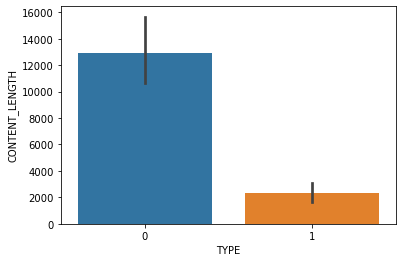

In [154]:
bar_plot = None # assign this to the outcome of sns.barplot call
pearson_r = None # assign this to value of the Pearson's correlation coefficient between APP_BYTES and APP_PACKETS

# YOUR CODE HERE
bar_plot = sns.barplot(data = data_ext, x = 'TYPE', y = 'CONTENT_LENGTH')
pearson_r = pearsonr('APP_BYTES','APP_PACKETS')

In [152]:
"""
Test the correctness of `bar_plot` and `pearson_r`
"""

# Tests
assert_equal(False, (bar_plot is None))
assert_equal(False, (pearson_r is None))

AssertionError: False != True

# Bonus: Machine Learning for Students of the Cohort 2019-2020
## Extra points if your score is > 22

In this part, you will be able to show your machine learning skills! Use the scikit-learn package to import all the subpackages that you need. Please follow the structure indicated in the following steps to train a classifier of your choice. The goal is to predict whether a URL is malicious or not.

In [ ]:
# import packages

from sklearn.neighbors import (NeighborhoodComponentsAnalysis, KNeighborsClassifier)
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline

### YOUR CODE HERE

"""
Extract the feature matrix X from our original DataFrame.
"""

### YOUR CODE HERE


"""
Similarly, we want to extract the target class column vector y.
"""

### YOUR CODE HERE


"""
Use a simple stratified train/test split
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 123, 
                                                    stratify = y)

print("Training Set shape: {}".format(X_train.shape))
print("Test Set shape: {}".format(X_test.shape))

## Train
Implement the following code to train a model of your choice.

In [ ]:
# Create model object

### YOUR CODE HERE

# Fit the model to the training set
model.fit(X_train, y_train)

## Evaluate

Run the following code to implement a function which evaluates the effectiveness of your classifier.

In [ ]:
"""
General function used to assess the quality of predictions
in terms of two scores: accuracy and ROC AUC (Area Under the ROC Curve)
"""
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

def evaluate(true_values, predicted_values):
    # Classification Accuracy
    print("Accuracy = {:.3f}".
          format(accuracy_score(true_values, predicted_values)))
    # Explained variance score: 1 is perfect prediction
    print("Area Under the ROC Curve (ROC AUC) = {:.3f}".
          format(roc_auc_score(true_values, predicted_values)))



Implement the following code to test your model.

In [ ]:
# Assess the quality of predictions made on the test set
print("***** Evaluate Performance on Test Set *****") 

### YOUR CODE HERE

model.evaluate(X_test, y_test)